In [65]:
import geopandas
import shapely
import json
from striprtf.striprtf import rtf_to_text

In [36]:
with open('Areas.txt','rb') as f:
    data=json.loads(f)

TypeError: the JSON object must be str, bytes or bytearray, not BufferedReader

In [61]:
with open('Districts.rtf','r') as f:
    x=f.readlines()
j=json.loads(rtf_to_text(x[9]))

In [ ]:
king_districts=[]
for f in j['features']:
    if('King' in f['attributes']['Counties']):
        king_districts.append(f)

In [102]:
king_districts[0]['attributes']

{'OBJECTID': 90,
 'OrganizationId': 100229,
 'ESDCode': '17801',
 'ESDNum': 121,
 'ESDName': 'Puget Sound Educational Service District 121',
 'LEACode': '17001',
 'LEAName': 'Seattle Public Schools',
 'ShortName': 'Seattle',
 'Label': None,
 'Counties': 'King',
 'CongressionalDistricts': '7, 9',
 'Type': 'Public School District',
 'Shape__Area': 4008400331.16443,
 'Shape__Length': 310124.678039317,
 'LegislativeDistricts': '11, 32, 34, 36, 37, 43, 46',
 'TransportationRegion': 2,
 'County': 'King'}

In [118]:
district_shapes={}
for d in king_districts:
    rings=d['geometry']['rings'][0]
    points=[shapely.geometry.Point(p) for p in rings]
    poly=shapely.geometry.Polygon(points)
    district_shapes[d['attributes']['LEAName']]=poly

In [139]:
list(district_shapes.keys())

['Seattle Public Schools',
 'Federal Way School District',
 'Enumclaw School District',
 'Mercer Island School District',
 'Highline School District',
 'Vashon Island School District',
 'Renton School District',
 'Skykomish School District',
 'Bellevue School District',
 'Tukwila School District',
 'Riverview School District',
 'Auburn School District',
 'Tahoma School District',
 'Snoqualmie Valley School District',
 'Issaquah School District',
 'Shoreline School District',
 'Lake Washington School District',
 'Kent School District',
 'Northshore School District',
 'Fife School District']

In [147]:
#columbia_center_gps=shapely.geometry.Point(-122.3326903,47.6049412)
def district_lookup(house):
    p=Point(house.long,house.lat)
    for district,area in district_shapes.items():
        if(area.contains(gps_location)):
            town=district
            break
        else:
            pass
    return town

'Federal Way School District'

In [140]:
a=district_shapes['Seattle Public Schools']

In [143]:
a.contains(x)

AttributeError: 'tuple' object has no attribute '_geom'

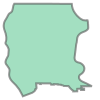

In [144]:
a